#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier, 
                              HistGradientBoostingClassifier)

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
!pip3 install catboost
from catboost import CatBoostClassifier

from sklearn.metrics import cohen_kappa_score

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ROCAUC


#Importing Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path="/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv"
dataset=pd.read_csv(path)
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
dataset.drop(dataset.columns[[0,1,2,3,4,11,12,13,15]], axis = 1, inplace = True)
dataset

,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,CALC,NObeyesdad
0,no,2.0,3.0,Sometimes,no,2.000000,no,Normal_Weight
1,no,3.0,3.0,Sometimes,yes,3.000000,Sometimes,Normal_Weight
2,no,2.0,3.0,Sometimes,no,2.000000,Frequently,Normal_Weight
3,no,3.0,3.0,Sometimes,no,2.000000,Frequently,Overweight_Level_I
4,no,2.0,1.0,Sometimes,no,2.000000,Sometimes,Overweight_Level_II
...,...,...,...,...,...,...,...,...
2106,yes,3.0,3.0,Sometimes,no,1.728139,Sometimes,Obesity_Type_III
2107,yes,3.0,3.0,Sometimes,no,2.005130,Sometimes,Obesity_Type_III
2108,yes,3.0,3.0,Sometimes,no,2.054193,Sometimes,Obesity_Type_III
2109,yes,3.0,3.0,Sometimes,no,2.852339,Sometimes,Obesity_Type_III


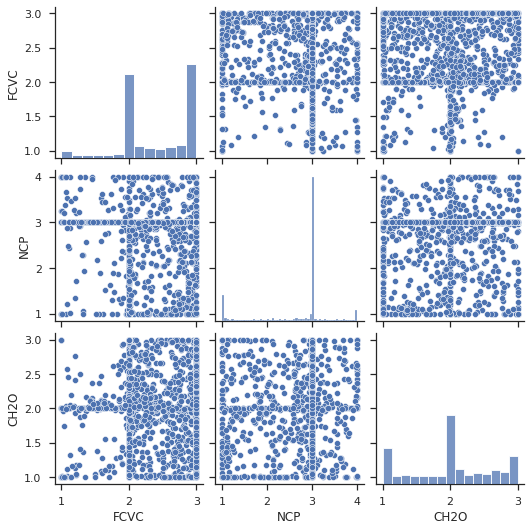

In [6]:
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(dataset)
plt.show()

In [7]:
dataset.isnull().values.any()

False

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FAVC        2111 non-null   object 
 1   FCVC        2111 non-null   float64
 2   NCP         2111 non-null   float64
 3   CAEC        2111 non-null   object 
 4   SMOKE       2111 non-null   object 
 5   CH2O        2111 non-null   float64
 6   CALC        2111 non-null   object 
 7   NObeyesdad  2111 non-null   object 
dtypes: float64(3), object(5)
memory usage: 132.1+ KB


In [9]:
dataset['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

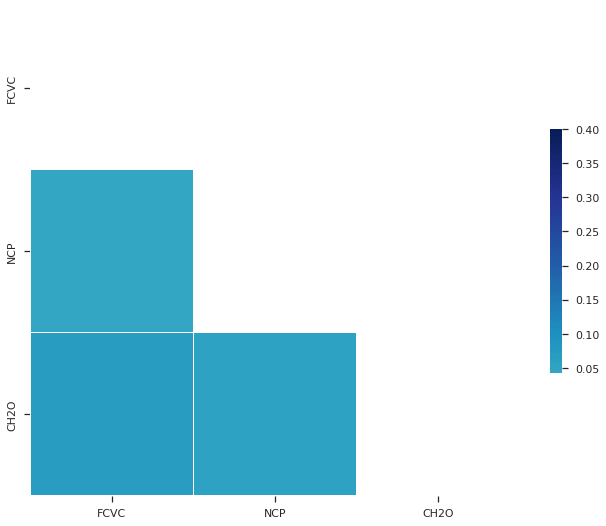

In [10]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.4, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
# Convert FAVC and SMOKE  into 0's and 1's
dataset["FAVC"] = dataset["FAVC"].apply(lambda x: 1 if x=="yes" else 0)
dataset["SMOKE"] = dataset["SMOKE"].apply(lambda x: 1 if x=="yes" else 0)

# label encoding
lbl_encode=LabelEncoder()
dataset['NObeyesdad']=lbl_encode.fit_transform(dataset['NObeyesdad'])

# One Hot encoding CAEC,CALC
data_dummies = dataset[['CAEC','CALC']]
data_dummies=pd.get_dummies(data_dummies)
dataset.drop(columns=['CAEC','CALC'],inplace=True)
data_NObeyesdad=dataset['NObeyesdad']
dataset.drop(columns=['NObeyesdad'],inplace=True)
dataset=dataset.merge(data_dummies,left_index=True, right_index=True,how='left')
dataset

,FAVC,FCVC,NCP,SMOKE,CH2O,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no
0,0,2.0,3.0,0,2.000000,0,0,1,0,0,0,0,1
1,0,3.0,3.0,1,3.000000,0,0,1,0,0,0,1,0
2,0,2.0,3.0,0,2.000000,0,0,1,0,0,1,0,0
3,0,3.0,3.0,0,2.000000,0,0,1,0,0,1,0,0
4,0,2.0,1.0,0,2.000000,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,3.0,3.0,0,1.728139,0,0,1,0,0,0,1,0
2107,1,3.0,3.0,0,2.005130,0,0,1,0,0,0,1,0
2108,1,3.0,3.0,0,2.054193,0,0,1,0,0,0,1,0
2109,1,3.0,3.0,0,2.852339,0,0,1,0,0,0,1,0


In [12]:
data_NObeyesdad.head(10)

0    1
1    1
2    1
3    5
4    6
5    1
6    1
7    1
8    1
9    1
Name: NObeyesdad, dtype: int64

In [13]:
X = dataset.values
y = data_NObeyesdad.values


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FAVC             2111 non-null   int64  
 1   FCVC             2111 non-null   float64
 2   NCP              2111 non-null   float64
 3   SMOKE            2111 non-null   int64  
 4   CH2O             2111 non-null   float64
 5   CAEC_Always      2111 non-null   uint8  
 6   CAEC_Frequently  2111 non-null   uint8  
 7   CAEC_Sometimes   2111 non-null   uint8  
 8   CAEC_no          2111 non-null   uint8  
 9   CALC_Always      2111 non-null   uint8  
 10  CALC_Frequently  2111 non-null   uint8  
 11  CALC_Sometimes   2111 non-null   uint8  
 12  CALC_no          2111 non-null   uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 99.1 KB


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)


X_train dataset:  (1688, 13)
y_train dataset:  (1688,)
X_test dataset:  (423, 13)
y_test dataset:  (423,)


In [16]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
models = []
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0,probability=True)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['XGBClassifier',XGBClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)])
models.append(['HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=0)])
models.append(['LGBMClassifier', LGBMClassifier(n_estimators=200, random_state=0)])
models.append(['CatBoostClassifier', CatBoostClassifier(verbose=0, n_estimators=100)])

Logistic Regression :
[[30 12  6 14  1  0  2]
 [10 12 10 10  6  1  8]
 [ 1  1 45 13  5  0  2]
 [ 0  0 16 30  5  0  2]
 [ 0  0  0  0 69  0  0]
 [ 1  4 12 26  8  4  2]
 [ 1  4 24 10  2  0 14]]
Accuracy Score:  0.48226950354609927

K-Fold Validation Mean Accuracy: 46.09 %

ROC AUC Score: 0.78 %

Precision: 0.39 %

Recall: 0.46 %

F1 Score: 0.42 %

Cohen Score: 0.39 %
----------------------------------------

SVM :
[[33 11  6  6  2  4  3]
 [ 5 19  7  8  6  3  9]
 [ 1  3 41 12  6  1  3]
 [ 0  0  2 43  5  1  2]
 [ 0  0  0  0 69  0  0]
 [ 0  5 14 14  6 15  3]
 [ 2  7 17  9  3  4 13]]
Accuracy Score:  0.5508274231678487

K-Fold Validation Mean Accuracy: 54.03 %

ROC AUC Score: 0.85 %

Precision: 0.45 %

Recall: 0.48 %

F1 Score: 0.47 %

Cohen Score: 0.47 %
----------------------------------------

KNeigbors :
[[42 11  6  3  0  3  0]
 [ 4 32  2  6  1  6  6]
 [ 3  5 37  4  4  4 10]
 [ 1  3  3 40  4  2  0]
 [ 0  0  0  0 69  0  0]
 [ 2  5 12 10  4 20  4]
 [ 3 12 12  8  0  3 17]]
Accuracy Score:  0

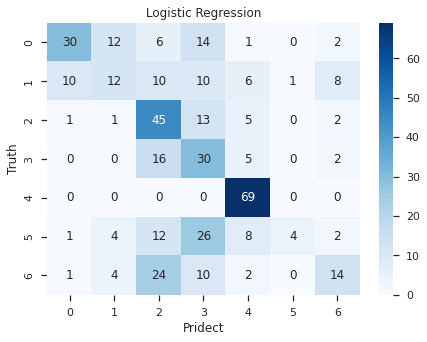

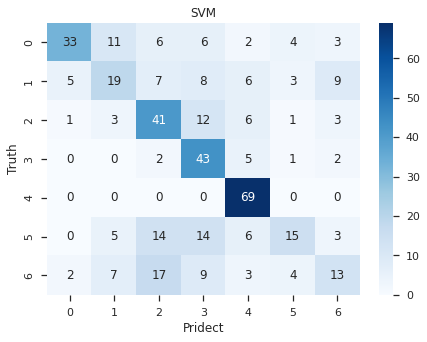

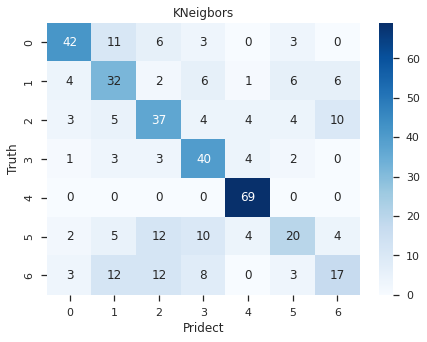

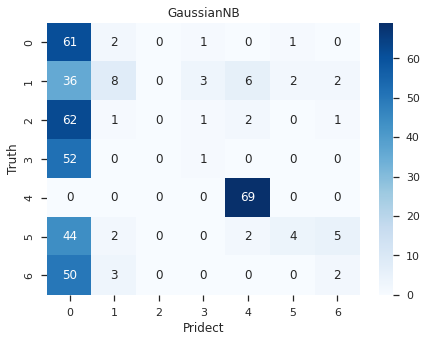

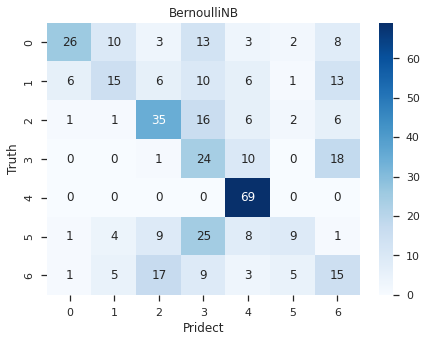

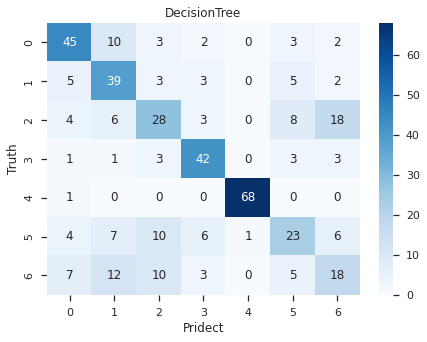

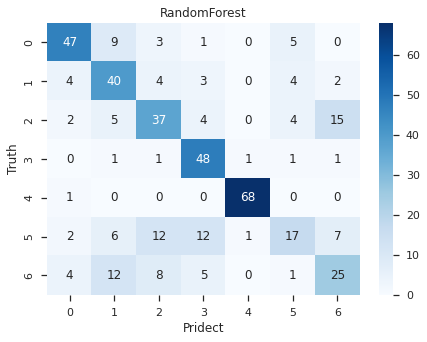

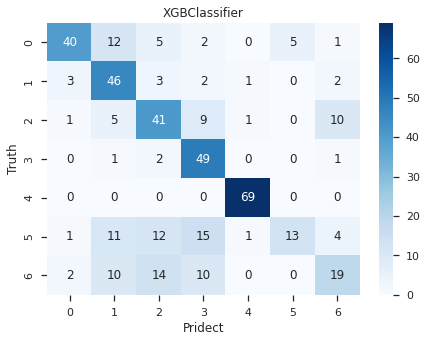

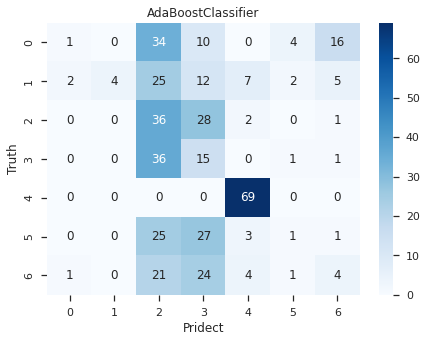

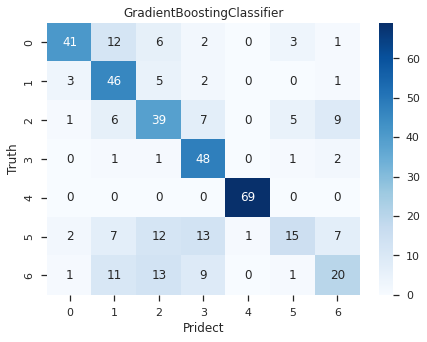

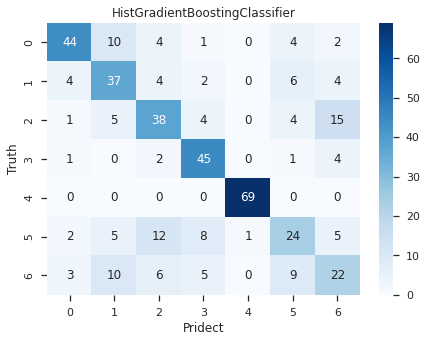

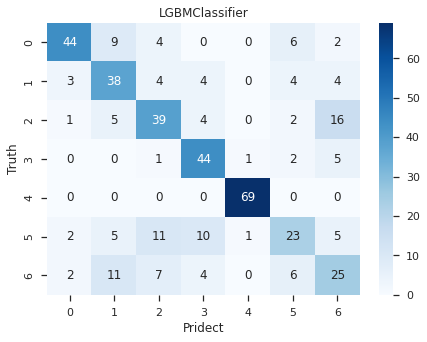

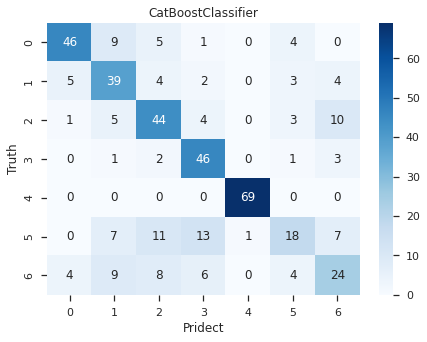

In [18]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_roc=model.predict_proba(X_test_scaled)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_scaled,y = y_train, cv=10)


    roc=roc_auc_score(y_test,y_pred_roc,multi_class="ovo",average='macro',  sample_weight=None,  max_fpr=None )
    precision = precision_score(y_test,y_pred,labels=[1,2], average='micro')
    recall = recall_score(y_test,y_pred,labels=[1,2], average='micro')
    f1 = f1_score(y_test,y_pred,labels=[1,2], average='micro')
    cohen_score = cohen_kappa_score(y_test, y_pred)
    print(models[m][0],':')
    print(cm)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(models[m][0])
    plt.xlabel('Pridect')
    plt.ylabel('Truth')
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    # print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    # print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('')
    print('Cohen Score: {:.2f} %'.format(cohen_score))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    # lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_2.append(cohen_score)
    lst_1.append(lst_2)

In [19]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','RoC-AuC','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

,Model,Accuracy,K-Fold Mean Accuracy,RoC-AuC,Precision,Recall,F1 Score,Cohen-Kappa Score
12,CatBoostClassifier,67.612293,65.757608,0.900577,0.576389,0.669355,0.619403,0.621666
6,RandomForest,66.666667,64.218442,0.883804,0.557971,0.620968,0.587786,0.610787
11,LGBMClassifier,66.666667,63.923288,0.895541,0.574627,0.620968,0.596899,0.610858
10,HistGradientBoostingClassifier,65.957447,64.632995,0.894760,0.563910,0.604839,0.583658,0.602511
9,GradientBoostingClassifier,65.721040,62.680332,0.897610,0.534591,0.685484,0.600707,0.599740
7,XGBClassifier,65.484634,62.440828,0.897556,0.537037,0.701613,0.608392,0.596959
5,DecisionTree,62.174941,61.850873,0.785959,0.507576,0.540323,0.523438,0.558276
2,KNeigbors,60.756501,58.295647,0.837129,0.492857,0.556452,0.522727,0.541155
1,SVM,55.082742,54.030008,0.851046,0.454545,0.483871,0.468750,0.474328
0,Logistic Regression,48.226950,46.090448,0.781997,0.390411,0.459677,0.422222,0.393197


Text(0.5, 1.0, 'Model Compare Graphic')

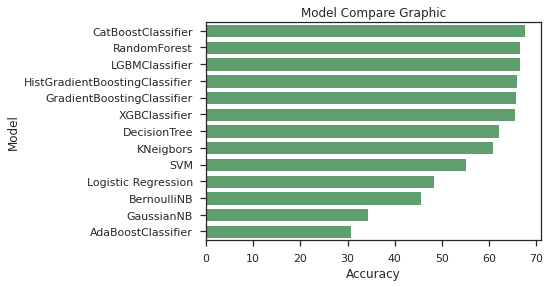

In [20]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='g')
plt.title('Model Compare Graphic')

In [21]:
grid_models = [(HistGradientBoostingClassifier(),[{'loss':['auto'], 'learning_rate':[0.1], 'max_iter':[100], 'max_leaf_nodes':[31], 'max_depth':[None], 'min_samples_leaf':[20], 'l2_regularization':[0.0], 'max_bins':[255], 'categorical_features':[None], 'monotonic_cst':[None], 'warm_start':[False], 'early_stopping':['auto'], 'scoring':['loss'], 'validation_fraction':[0.1], 'n_iter_no_change':[10], 'tol':[1e-07], 'verbose':[0], 'random_state':[None]}]), 
               (LGBMClassifier(),[{'boosting_type':['gbdt'], 'num_leaves':[31], 'max_depth': [1], 'learning_rate':[0.1], 'n_estimators':[100], 'subsample_for_bin':[200000], 'objective':[None], 'class_weight':[None], 'min_split_gain':[0.0], 'min_child_weight':[0.001], 'min_child_samples':[20], 'subsample':[1.0], 'subsample_freq':[0], 'colsample_bytree':[1.0], 'reg_alpha':[0.0], 'reg_lambda':[0.0], 'random_state':[None], 'n_jobs':[ 1], 'importance_type':['split']}]), 
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (CatBoostClassifier(), [{'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}]),
               (GradientBoostingClassifier(),[{'learning_rate':[0.1],'n_estimators':[100],'subsample':[1.0],'criterion':['friedman_mse'], 'min_samples_split':[2], 'min_samples_leaf':[1], 'min_weight_fraction_leaf':[0.0], 'max_depth':[3], 'min_impurity_decrease':[0.0], 'init':[None], 'random_state':[None], 'max_features':[None], 'verbose':[0], 'max_leaf_nodes':[None], 'warm_start':[False], 'validation_fraction':[0.1], 'n_iter_no_change':[None], 'tol':[0.0001], 'ccp_alpha':[0.0]}]),
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]),
                (SVC(), [{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}])]

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_scaled, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print(' Best Parameters is', best_param)
    print('')
    print('-'*25)
    print('')

Streaming output truncated to the last 5000 lines.
149:	learn: 0.5618088	total: 573ms	remaining: 191ms
150:	learn: 0.5612287	total: 578ms	remaining: 187ms
151:	learn: 0.5601693	total: 581ms	remaining: 184ms
152:	learn: 0.5589101	total: 585ms	remaining: 180ms
153:	learn: 0.5576669	total: 588ms	remaining: 176ms
154:	learn: 0.5556711	total: 592ms	remaining: 172ms
155:	learn: 0.5546671	total: 595ms	remaining: 168ms
156:	learn: 0.5541381	total: 599ms	remaining: 164ms
157:	learn: 0.5526853	total: 602ms	remaining: 160ms
158:	learn: 0.5518457	total: 606ms	remaining: 156ms
159:	learn: 0.5510286	total: 609ms	remaining: 152ms
160:	learn: 0.5494380	total: 613ms	remaining: 148ms
161:	learn: 0.5485248	total: 617ms	remaining: 145ms
162:	learn: 0.5477732	total: 621ms	remaining: 141ms
163:	learn: 0.5471227	total: 624ms	remaining: 137ms
164:	learn: 0.5463288	total: 628ms	remaining: 133ms
165:	learn: 0.5452754	total: 631ms	remaining: 129ms
166:	learn: 0.5441879	total: 635ms	remaining: 125ms
167:	learn: 0

In [24]:
tuned_models = []

tuned_models.append(['HistGradientBoostingClassifier',HistGradientBoostingClassifier(learning_rate=0.1 , random_state=0)])
tuned_models.append(['LGBMClassifier',LGBMClassifier(learning_rate=0.1,n_estimators=200 , random_state=None)])
tuned_models.append(['XGBClassifier',XGBClassifier(random_state=0, eval_metric= 'error', learning_rate= 0.1)])
tuned_models.append(['GradientBoostingClassifier',GradientBoostingClassifier(n_estimators=200, learning_rate=0.1 , random_state=0)])
tuned_models.append(['RandomForest',RandomForestClassifier(criterion= 'entropy', n_estimators= 200, random_state= 0)])
tuned_models.append(['DecisionTree',DecisionTreeClassifier(criterion= 'gini', random_state= 0)])
#tuned_models.append(['SVM',SVC(random_state=0, C= 1, gamma= 1, kernel= 'rbf')])
tuned_models.append(['CatBoostClassifier', CatBoostClassifier(verbose=0, n_estimators=100)])

HistGradientBoostingClassifier :
[[44 10  4  1  0  4  2]
 [ 4 37  4  2  0  6  4]
 [ 1  5 38  4  0  4 15]
 [ 1  0  2 45  0  1  4]
 [ 0  0  0  0 69  0  0]
 [ 2  5 12  8  1 24  5]
 [ 3 10  6  5  0  9 22]]
Accuracy Score:  0.6595744680851063

K-Fold Validation Mean Accuracy: 64.63 %

ROC AUC Score: 0.89 %

Precision: 0.56 %

Recall: 0.60 %

F1 Score: 0.58 %

Cohen Score: 0.60 %
----------------------------------------

LGBMClassifier :
[[44  9  4  0  0  6  2]
 [ 3 38  4  4  0  4  4]
 [ 1  5 39  4  0  2 16]
 [ 0  0  1 44  1  2  5]
 [ 0  0  0  0 69  0  0]
 [ 2  5 11 10  1 23  5]
 [ 2 11  7  4  0  6 25]]
Accuracy Score:  0.6666666666666666

K-Fold Validation Mean Accuracy: 63.92 %

ROC AUC Score: 0.90 %

Precision: 0.57 %

Recall: 0.62 %

F1 Score: 0.60 %

Cohen Score: 0.61 %
----------------------------------------

XGBClassifier :
[[40 12  5  2  0  5  1]
 [ 3 46  3  2  1  0  2]
 [ 1  5 41  9  1  0 10]
 [ 0  1  2 49  0  0  1]
 [ 0  0  0  0 69  0  0]
 [ 1 11 12 15  1 13  4]
 [ 2 10 14 10  0  

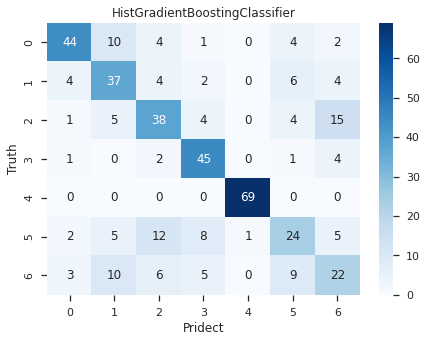

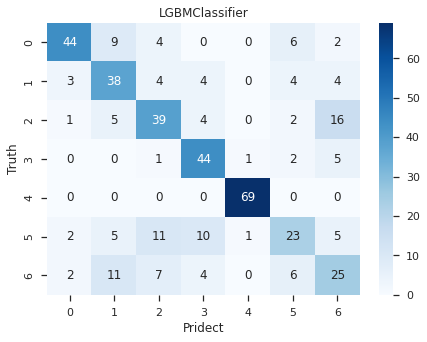

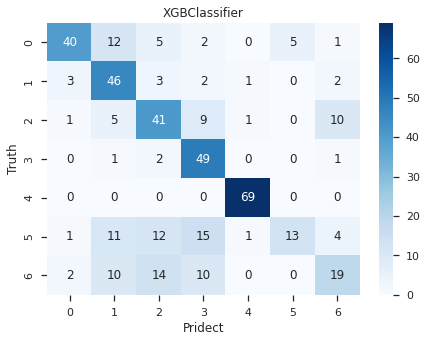

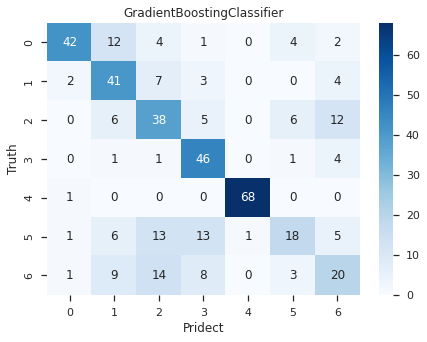

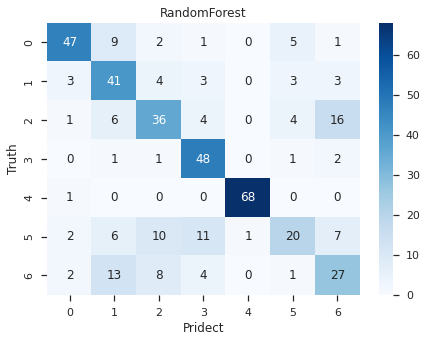

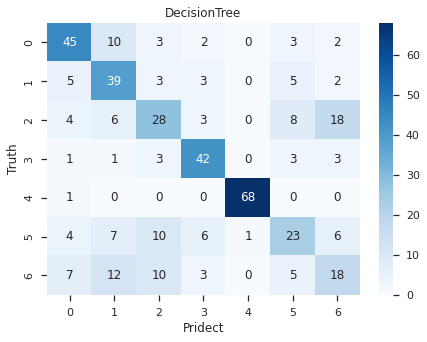

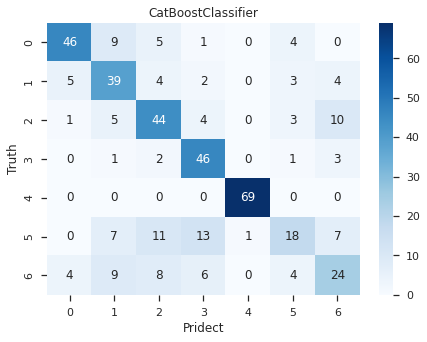

In [25]:
lst_3 = []
for m in range(len(tuned_models)):
    lst_4 = []
    model = tuned_models[m][1]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_roc=model.predict_proba(X_test_scaled)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_scaled,y = y_train, cv=10)


    roc=roc_auc_score(y_test,y_pred_roc,multi_class="ovo",average='macro',  sample_weight=None,  max_fpr=None )
    precision = precision_score(y_test,y_pred,labels=[1,2], average='micro')
    recall = recall_score(y_test,y_pred,labels=[1,2], average='micro')
    f1 = f1_score(y_test,y_pred,labels=[1,2], average='micro')
    cohen_score = cohen_kappa_score(y_test, y_pred)
    print(tuned_models[m][0],':')
    print(cm)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(tuned_models[m][0])
    plt.xlabel('Pridect')
    plt.ylabel('Truth')
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    # print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    # print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('')
    print('Cohen Score: {:.2f} %'.format(cohen_score))
    print('-'*40)
    print('')
    lst_4.append(tuned_models[m][0])
    lst_4.append(accuracy_score(y_test,y_pred)*100)
    lst_4.append(accuracies.mean()*100)
    # lst_4.append(accuracies.std()*100)
    lst_4.append(roc)
    lst_4.append(precision)
    lst_4.append(recall)
    lst_4.append(f1)
    lst_4.append(cohen_score)
    lst_3.append(lst_4)

In [26]:
df3 = pd.DataFrame(lst_3,columns=['Model','Accuracy','K-Fold Mean Accuracy','RoC-AuC','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])

df3.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df3

,Model,Accuracy,K-Fold Mean Accuracy,RoC-AuC,Precision,Recall,F1 Score,Cohen-Kappa Score
4,RandomForest,67.848700,65.048605,0.889396,0.562044,0.620968,0.590038,0.624804
6,CatBoostClassifier,67.612293,65.757608,0.900577,0.576389,0.669355,0.619403,0.621666
1,LGBMClassifier,66.666667,63.923288,0.895541,0.574627,0.620968,0.596899,0.610858
0,HistGradientBoostingClassifier,65.957447,64.632995,0.894760,0.563910,0.604839,0.583658,0.602511
2,XGBClassifier,65.484634,62.440828,0.897556,0.537037,0.701613,0.608392,0.596959
3,GradientBoostingClassifier,64.539007,61.374331,0.893483,0.519737,0.637097,0.572464,0.585949
5,DecisionTree,62.174941,61.850873,0.785959,0.507576,0.540323,0.523438,0.558276


Text(0.5, 1.0, 'Model Compare Graphic')

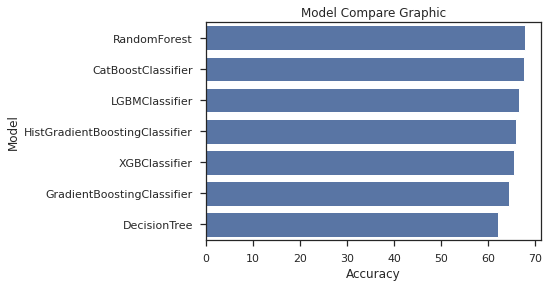

In [27]:
sns.barplot(x='Accuracy',y='Model',data=df3,color='b')
plt.title('Model Compare Graphic')

In [28]:
def plot_ROC_curve(model, X_train_scaled, y_train, X_test_scaled, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train_scaled, y_train)
    visualizer.score(X_test_scaled, y_test)
    visualizer.show()
    
    return visualizer

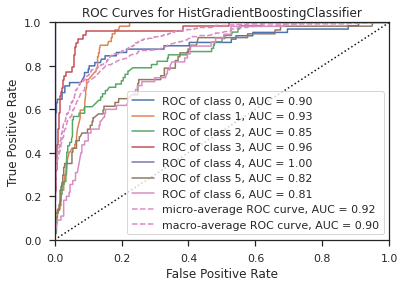

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9589712090>,
       estimator=HistGradientBoostingClassifier(random_state=0))

In [29]:
plot_ROC_curve(HistGradientBoostingClassifier(learning_rate=0.1 , random_state=0),X_train_scaled, y_train, X_test_scaled, y_test)
